In [ ]:
# Import packages
import tensorflow as tf
import numpy as np
import csv
import random

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [ ]:
# Load data
data = [] # list of lists of the form [smiles, sequence, pKd]

with open('dta_df.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader) # skip header
  for row in reader:
      triplet = []
      triplet.append(row[0])
      triplet.append(row[1])
      triplet.append(float(row[2]))
      data.append(triplet)

len(data) # 23785

23785

In [ ]:
data[0]

['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSE

In [ ]:
smiles = []
proteins = []
labels = []
random.shuffle(data)

for triplet in range(len(data)):
  smiles.append(data[triplet][0])
  proteins.append(data[triplet][1])
  labels.append(data[triplet][2])

In [ ]:
print(smiles[0])
print(proteins[0])
print(labels[0])
# looks good!

CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=C5C=NNC5=CC=C4)N6CCOCC6
MSTFRQEDVEDHYEMGEELGSGQFAIVRKCRQKGTGKEYAAKFIKKRRLSSSRRGVSREEIEREVNILREIRHPNIITLHDIFENKTDVVLILELVSGGELFDFLAEKESLTEDEATQFLKQILDGVHYLHSKRIAHFDLKPENIMLLDKNVPNPRIKLIDFGIAHKIEAGNEFKNIFGTPEFVAPEIVNYEPLGLEADMWSIGVITYILLSGASPFLGETKQETLTNISAVNYDFDEEYFSNTSELAKDFIRRLLVKDPKRRMTIAQSLEHSWIKAIRRRNVRGEDSGRKPERRRLKTTRLKEYTIKSHSSLPPNNSYADFERFSKVLEEAAAAEEGLRELQRSRRLCHEDVEALAAIYEEKEAWYREESDSLGQDLRRLRQELLKTEALKRQAQEEAKGALLGTSGLKRRFSRLENRYEALAKQVASEMRFVQDLVRALEQEKLQGVECGLR
5.7447274948966935


In [ ]:
split = int(0.9 * len(smiles))
train_smiles = smiles[:split]
test_smiles = smiles[split:]
train_proteins = proteins[:split]
test_proteins = proteins[split:]
train_labels = labels[:split]
test_labels = labels[split:]

In [ ]:
# Tokenize smiles
# train
tokenizer_smiles = Tokenizer(char_level = True)
tokenizer_smiles.fit_on_texts(train_smiles)

word_index_smiles = tokenizer_smiles.word_index
vocab_size_smiles = len(word_index_smiles)

train_sequences_smiles = tokenizer_smiles.texts_to_sequences(train_smiles)
train_padded_smiles = pad_sequences(train_sequences_smiles, truncating = "post", padding = "post", maxlen = 85)

# test
test_sequences_smiles = tokenizer_smiles.texts_to_sequences(test_smiles)
test_padded_smiles = pad_sequences(test_sequences_smiles, truncating = "post", padding = "post", maxlen = 85)

In [ ]:
# Tokenize proteins
# train
tokenizer_proteins = Tokenizer(char_level = True)
tokenizer_proteins.fit_on_texts(train_proteins)

word_index_proteins = tokenizer_proteins.word_index
vocab_size_proteins = len(word_index_proteins)

train_sequences_proteins = tokenizer_proteins.texts_to_sequences(train_proteins)
train_padded_proteins = pad_sequences(train_sequences_proteins, truncating = "post", padding = "post", maxlen = 1200)

# test
test_sequences_proteins = tokenizer_proteins.texts_to_sequences(test_proteins)
test_padded_proteins = pad_sequences(test_sequences_proteins, truncating = "post", padding = "post", maxlen = 1200)

In [ ]:
print(vocab_size_smiles)
print(vocab_size_proteins)

22
20


In [ ]:
# convert to numpy arrays and check dimensions
train_smiles_array = np.array(train_padded_smiles)
test_smiles_array = np.array(test_padded_smiles)
train_proteins_array = np.array(train_padded_proteins)
test_proteins_array = np.array(test_padded_proteins)
train_labels_array = np.array(train_labels, dtype = "float32")
test_labels_array = np.array(test_labels, dtype = "float32")

print(f"Train smiles array shape: {train_smiles_array.shape}")
print(f"Test smiles array shape: {test_smiles_array.shape}")
print(f"Train proteins array shape: {train_proteins_array.shape}")
print(f"Test proteins array shape: {test_proteins_array.shape}")
print(f"Train labels array shape: {train_labels_array.shape}")
print(f"Test labels array shape: {test_labels_array.shape}")

Train smiles array shape: (21406, 85)
Test smiles array shape: (2379, 85)
Train proteins array shape: (21406, 1200)
Test proteins array shape: (2379, 1200)
Train labels array shape: (21406,)
Test labels array shape: (2379,)


In [ ]:
from keras.layers import Input, Embedding, Concatenate, Conv1D, GlobalAveragePooling1D, Dense, Dropout, Bidirectional, LSTM, Flatten, GlobalMaxPooling1D
from keras.models import Model

# Define two input layers
smile_input = Input((85,))
protein_input = Input((1200,))

# smiles encoder
embed_smiles = Embedding(vocab_size_smiles+1, 128, input_length=85)(smile_input)
conv_smiles = Conv1D(32, 4, activation = "relu")(embed_smiles)
conv_smiles = Conv1D(64, 6, activation = "relu")(conv_smiles)
conv_smiles = Conv1D(96, 8, activation = "relu")(conv_smiles)
max_smiles = GlobalMaxPooling1D()(conv_smiles)

# proteins encoder
embed_protein = Embedding(vocab_size_proteins+1, 128, input_length=1200)(protein_input)
conv_protein = Conv1D(32, 4, activation = "relu")(embed_protein)
conv_protein = Conv1D(64, 8, activation = "relu")(conv_protein)
conv_protein = Conv1D(96, 12, activation = "relu")(conv_protein)
max_protein = GlobalMaxPooling1D()(conv_protein)

# concatenate the two encoder outputs
concat_layer = Concatenate()([max_smiles, max_protein])

# decoder
output = Dense(1024, activation = "relu")(concat_layer)
output = Dropout(0.1)(output)
output = Dense(1024, activation = "relu")(output)
output = Dropout(0.1)(output)
output = Dense(512, activation = "relu")(output)
output = Dense(1)(output)

# define a model with a list of two inputs
model = Model(inputs = [smile_input, protein_input], outputs = output)

In [ ]:
# # define a model with a list of two inputs
# model = Model(inputs = [smile_input, protein_input], outputs = output)

# # compile model
# optimizer = optimizers.Adam(learning_rate = 0.001)
# model.compile(loss='mse', optimizer = optimizer, metrics=['mse'])

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this number as needed

# Initialize lists to store the evaluation results for each fold
mse_scores = []

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Split your data into training and validation sets for each fold
for train_index, val_index in kf.split(train_smiles_array, train_proteins_array):
    # Split the data into training and validation sets for this fold
    X_train_fold_smiles, X_val_fold_smiles = train_smiles_array[train_index], train_smiles_array[val_index]
    X_train_fold_proteins, X_val_fold_proteins = train_proteins_array[train_index], train_proteins_array[val_index]
    y_train_fold, y_val_fold = train_labels_array[train_index], train_labels_array[val_index]

    # Create and compile the model (you can optionally reset the model here if needed)
    model = Model(inputs=[smile_input, protein_input], outputs=output)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

    # Train the model on the current fold
    history = model.fit([X_train_fold_smiles, X_train_fold_proteins], y_train_fold,
                        epochs=100, batch_size=256, validation_data=([X_val_fold_smiles, X_val_fold_proteins], y_val_fold))

    # Evaluate the model on the validation set for this fold
    val_loss = model.evaluate([X_val_fold_smiles, X_val_fold_proteins], y_val_fold, verbose=0)

    # Append the validation MSE score to the list
    mse_scores.append(val_loss[1])

# Calculate the mean and standard deviation of MSE scores across all folds
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Print the cross-validation results
print(f"Mean MSE: {mean_mse}")
print(f"Std Dev MSE: {std_mse}")


Epoch 1/100
67/67 [==============================] - 10s 132ms/step - loss: 0.1051 - mse: 0.1051 - val_loss: 0.1049 - val_mse: 0.1049
Epoch 2/100
67/67 [==============================] - 6s 87ms/step - loss: 0.1076 - mse: 0.1076 - val_loss: 0.1078 - val_mse: 0.1078
Epoch 3/100
67/67 [==============================] - 6s 88ms/step - loss: 0.1007 - mse: 0.1007 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 4/100
67/67 [==============================] - 6s 87ms/step - loss: 0.0955 - mse: 0.0955 - val_loss: 0.1705 - val_mse: 0.1705
Epoch 5/100
67/67 [==============================] - 6s 88ms/step - loss: 0.1056 - mse: 0.1056 - val_loss: 0.1181 - val_mse: 0.1181
Epoch 6/100
67/67 [==============================] - 6s 91ms/step - loss: 0.0848 - mse: 0.0848 - val_loss: 0.1228 - val_mse: 0.1228
Epoch 7/100
67/67 [==============================] - 6s 89ms/step - loss: 0.0793 - mse: 0.0793 - val_loss: 0.1279 - val_mse: 0.1279
Epoch 8/100
67/67 [==============================] - 6s 89ms/step - loss: 

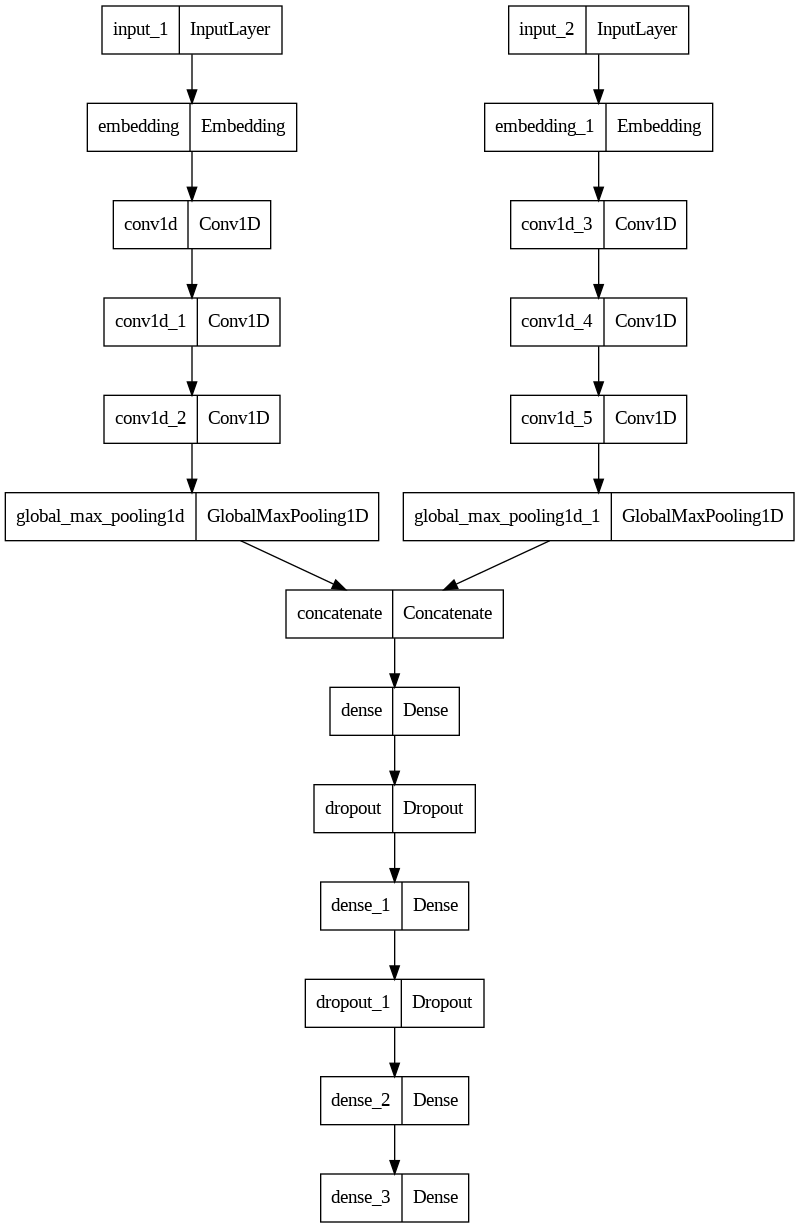

In [ ]:
# visualize model
tf.keras.utils.plot_model(model)
#model.summary()

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(
#     min_delta=0.001, # minimium amount of change to count as an improvement
#     patience=10, # how many epochs to wait before stopping
#     restore_best_weights=True,
# )

# history = model.fit([train_smiles_array, train_proteins_array], train_labels_array,
#                     epochs = 100, batch_size = 256, validation_data = ([test_smiles_array, test_proteins_array], test_labels_array), callbacks = [early_stopping])

<Figure size 640x480 with 0 Axes>

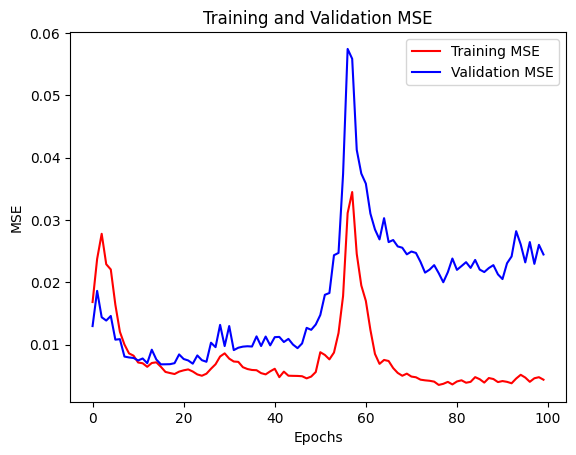

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mse=history.history['mse']
val_mse=history.history['val_mse']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(mse)) # Get number of epochs

#------------------------------------------------
# Plot training and validation mse per epoch
#------------------------------------------------
plt.plot(epochs, mse, 'r')
plt.plot(epochs, val_mse, 'b')
plt.title('Training and Validation MSE')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend(["Training MSE", "Validation MSE"])

plt.figure()

In [ ]:
# Function to predict drug-protein pKd

def predict_pKd(drug, protein):
  drug_sequence = tokenizer_smiles.texts_to_sequences([drug])
  drug_padded = pad_sequences(drug_sequence, truncating = "post", padding = "post", maxlen = 85)
  protein_sequence = tokenizer_proteins.texts_to_sequences([protein])
  protein_padded = pad_sequences(protein_sequence, truncating = "post", padding = "post", maxlen = 1200)
  prediction = model.predict([tf.expand_dims(drug_padded, axis = -1), tf.expand_dims(protein_padded, axis = -1)])

  return(prediction.item())

In [ ]:
drug = test_smiles[31]
protein = test_proteins[531]
label = test_labels[1531]

print(label)
predict_pKd(drug = drug, protein = protein)

10.4089353929735
1/1 [==============================] - 0s 136ms/step


4.951932907104492

In [ ]:
test_labels.index(max(test_labels))

1531

75/75 [==============================] - 1s 6ms/step


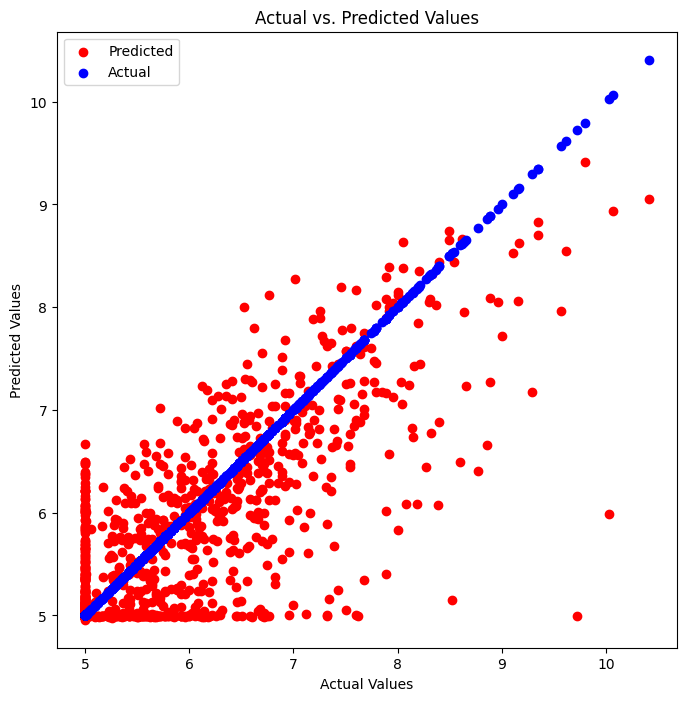

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test data
predictions = model.predict([test_smiles_array, test_proteins_array])

# Plot the actual values in blue and the predicted values in red
plt.figure(figsize=(8, 8))
plt.scatter(test_labels_array, predictions, c='red', label='Predicted')
plt.scatter(test_labels_array, test_labels_array, c='blue', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
